In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df1 = pd.read_csv('data/data.csv')
df1

,day,Humidity(%),Tmax(oC),Tmin(oc),Rain(mm)
0,1,94.7,13.0,5.6,0.0
1,2,100.0,16.4,2.5,9.9
2,3,98.4,22.0,2.3,0.3
3,4,98.4,19.5,1.0,0.0
4,5,96.8,20.0,1.4,0.0
...,...,...,...,...,...
355,356,95.4,20.5,2.7,0.0
356,357,94.2,20.5,3.0,0.0
357,358,95.6,20.0,3.7,0.0
358,359,91.1,19.2,2.2,0.0


In [3]:
df1 = df1.set_index('day')
df1

,Humidity(%),Tmax(oC),Tmin(oc),Rain(mm)
day,,,,
1,94.7,13.0,5.6,0.0
2,100.0,16.4,2.5,9.9
3,98.4,22.0,2.3,0.3
4,98.4,19.5,1.0,0.0
5,96.8,20.0,1.4,0.0
...,...,...,...,...
356,95.4,20.5,2.7,0.0
357,94.2,20.5,3.0,0.0
358,95.6,20.0,3.7,0.0


In [4]:
df1['temp(oC)'] = (df1['Tmax(oC)']+df1['Tmin(oc)'])/2
df1

,Humidity(%),Tmax(oC),Tmin(oc),Rain(mm),temp(oC)
day,,,,,
1,94.7,13.0,5.6,0.0,9.30
2,100.0,16.4,2.5,9.9,9.45
3,98.4,22.0,2.3,0.3,12.15
4,98.4,19.5,1.0,0.0,10.25
5,96.8,20.0,1.4,0.0,10.70
...,...,...,...,...,...
356,95.4,20.5,2.7,0.0,11.60
357,94.2,20.5,3.0,0.0,11.75
358,95.6,20.0,3.7,0.0,11.85


In [5]:
df1.iloc[1,4]

9.45

In [6]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Humidity(%),360.0,88.215556,8.913733,52.1,82.775,89.900,95.225,100.00
Tmax(oC),360.0,25.894722,4.120923,11.2,22.650,27.150,29.225,33.10
Tmin(oc),360.0,12.822222,6.513911,-1.3,7.500,13.400,19.500,21.50
Rain(mm),360.0,4.068611,9.943038,0.0,0.000,0.000,1.600,75.00
temp(oC),360.0,19.358472,5.067583,9.1,14.775,20.725,23.825,26.55


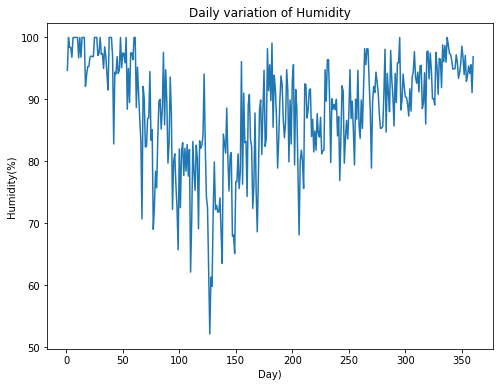

In [7]:
plt.figure(figsize = [8,6])
plt.plot(df1.index,df1['Humidity(%)'])
plt.xlabel('Day)')
plt.ylabel('Humidity(%)')
plt.title('Daily variation of Humidity')
plt.show()

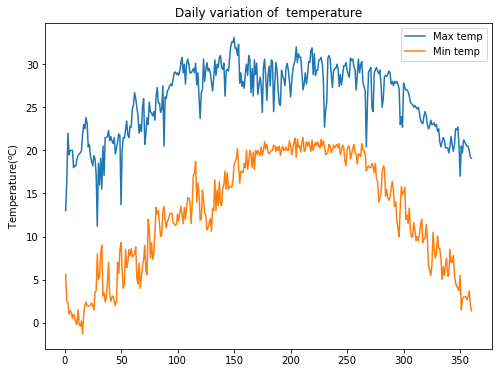

In [8]:
plt.figure(figsize = [8,6])
plt.plot(df1.index,df1['Tmax(oC)'],label='Max temp')
plt.plot(df1.index,df1['Tmin(oc)'],label='Min temp')
plt.ylabel('Temperature($^o$C)')
plt.title('Daily variation of  temperature')
plt.legend()
plt.show()

In [9]:
day=[0,30,60,90,120,150,180,210,240,270,300,330,360]
mtemp=[]
mRH=[]
mrain=[]
for i in range(12):
    mRH.append(np.sum(df1.iloc[day[i]+1:day[i+1],0])/30)
    mtemp.append(np.sum(df1.iloc[day[i]+1:day[i+1],4])/30)
    mrain.append(np.sum(df1.iloc[day[i]+1:day[i+1],3]))

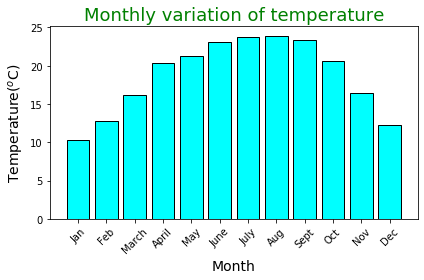

In [10]:
m = np.arange(1,13)
month=['Jan','Feb','March','April','May','June','July','Aug','Sept','Oct','Nov','Dec']
plt.bar(m,mtemp,color='cyan',edgecolor='black') 
plt.xticks(m, month )
plt.xlabel('Month', fontsize=14)
plt.ylabel('Temperature($^o$C)', fontsize=14) 
plt.tick_params(axis='x', rotation= 45)
plt.title('Monthly variation of temperature', fontsize = 18 ,color='green') 
plt.tight_layout() 
plt.show()

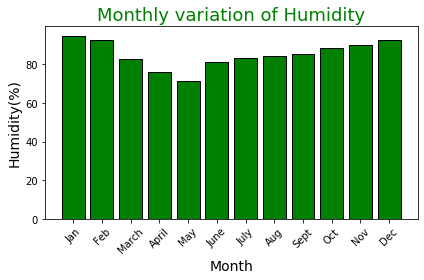

In [11]:
plt.bar(m,mRH,color='green',edgecolor='black') 
plt.xticks(m, month )
plt.xlabel('Month', fontsize=14)
plt.ylabel('Humidity(%)', fontsize=14) 
plt.tick_params(axis='x', rotation= 45)
plt.title('Monthly variation of Humidity', fontsize = 18 ,color='green') 
plt.tight_layout() 
plt.show()

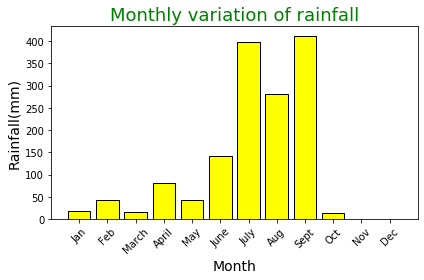

In [12]:
plt.bar(m,mrain,color='yellow',edgecolor='black') 
plt.xticks(m, month )
plt.xlabel('Month', fontsize=14)
plt.ylabel('Rainfall(mm)', fontsize=14) 
plt.tick_params(axis='x', rotation= 45)
plt.title('Monthly variation of rainfall', fontsize = 18 ,color='green') 
plt.tight_layout() 
plt.show()

In [13]:
def DewPoin(t,rh):
    a=17.27
    b=237.7
    x=a*t/(b+t)
    nm=b*(x+np.log(rh/100))
    dm=a-(x+np.log(rh/100))
    y=nm/dm
    return y

In [14]:
dt=DewPoin(26,78)
dt

21.85732599954956

In [15]:
df1['dewpoint(oC)']=DewPoin(df1['temp(oC)'],df1['Humidity(%)'])
df1

,Humidity(%),Tmax(oC),Tmin(oc),Rain(mm),temp(oC),dewpoint(oC)
day,,,,,,
1,94.7,13.0,5.6,0.0,9.30,8.493324
2,100.0,16.4,2.5,9.9,9.45,9.450000
3,98.4,22.0,2.3,0.3,12.15,11.904965
4,98.4,19.5,1.0,0.0,10.25,10.008675
5,96.8,20.0,1.4,0.0,10.70,10.212111
...,...,...,...,...,...,...
356,95.4,20.5,2.7,0.0,11.60,10.889071
357,94.2,20.5,3.0,0.0,11.75,10.847578
358,95.6,20.0,3.7,0.0,11.85,11.169239


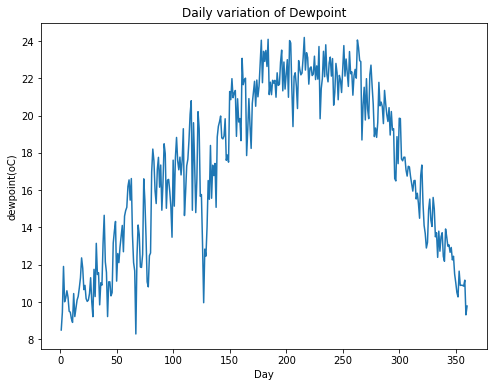

In [16]:
plt.figure(figsize = [8,6])
plt.plot(df1.index,df1['dewpoint(oC)'])
plt.xlabel('Day')
plt.ylabel('dewpoint(oC)')
plt.title('Daily variation of Dewpoint')
plt.show()